# Guiding questions

How does graduate student gender diversity at Columbia compare to its peer institutions?

In [49]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
TOTALS = pickle.load(open('../../../data/Detailed_Sex_RaceEthnicity_Graduates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

# Convenient function for making subplots for every institution
def subplots(num=len(institutions), cols=2):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(10 * cols, 10 * rows))

def get_proportions(inst, field):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            fem_count = field_stats.get('Female', 0)
            if isinstance(fem_count, dict):
                fem_count = fem_count['Total for selected values']
                
            proportions.append(
                fem_count /
                    field_stats['Total for selected values']['Total for selected values']
            )
    return proportions

def plot_inst(ax, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst == highlight:
            continue
        ax.plot(years, get_proportions(inst, field), label=inst)
    ax.plot(years, get_proportions(highlight, field), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('% female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(field)
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    
def get_counts(field, inst='Columbia University in the City of New York'):
    females = []
    males = []
    for year in years:
        stats = TOTALS[year]['Columbia University in the City of New York'].get(field, None)
        if stats is None:
            females.append(None)
            males.append(None)
            continue
        females.append(stats['Female']['Total for selected values'])
        males.append(stats['Male']['Total for selected values'])
    return females, males

def plot_counts(ax, field):
    females, males = get_counts(field)
    ax.plot(years, females, label='females')
    ax.plot(years, males, label='males')
    ax.legend()
    ax.set_title(field)

def plot_connected(ax, field, inst='Columbia University in the City of New York'):
    females, males = get_counts(field)
    ax.plot(females, males)
    
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()    
    btm = min(ymin, xmin)
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=btm, top=top)
    ax.set_xlim(left=btm, right=top)
        
    ax.plot([0, 1000], [0, 1000], color='gray', linestyle='--')

    ax.set_title(field)

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [56]:
def plot_triplet(axArr, index, field):
    plot_inst(axArr[i, 0], field)
    plot_counts(axArr[i, 1], field)
    plot_connected(axArr[i, 2], field)

In [52]:
fig, axArr = subplots(len(fields)*3, cols=3)
for i, field in enumerate(fields):
    plot_triplet(axArr, i, field)
fig.tight_layout()

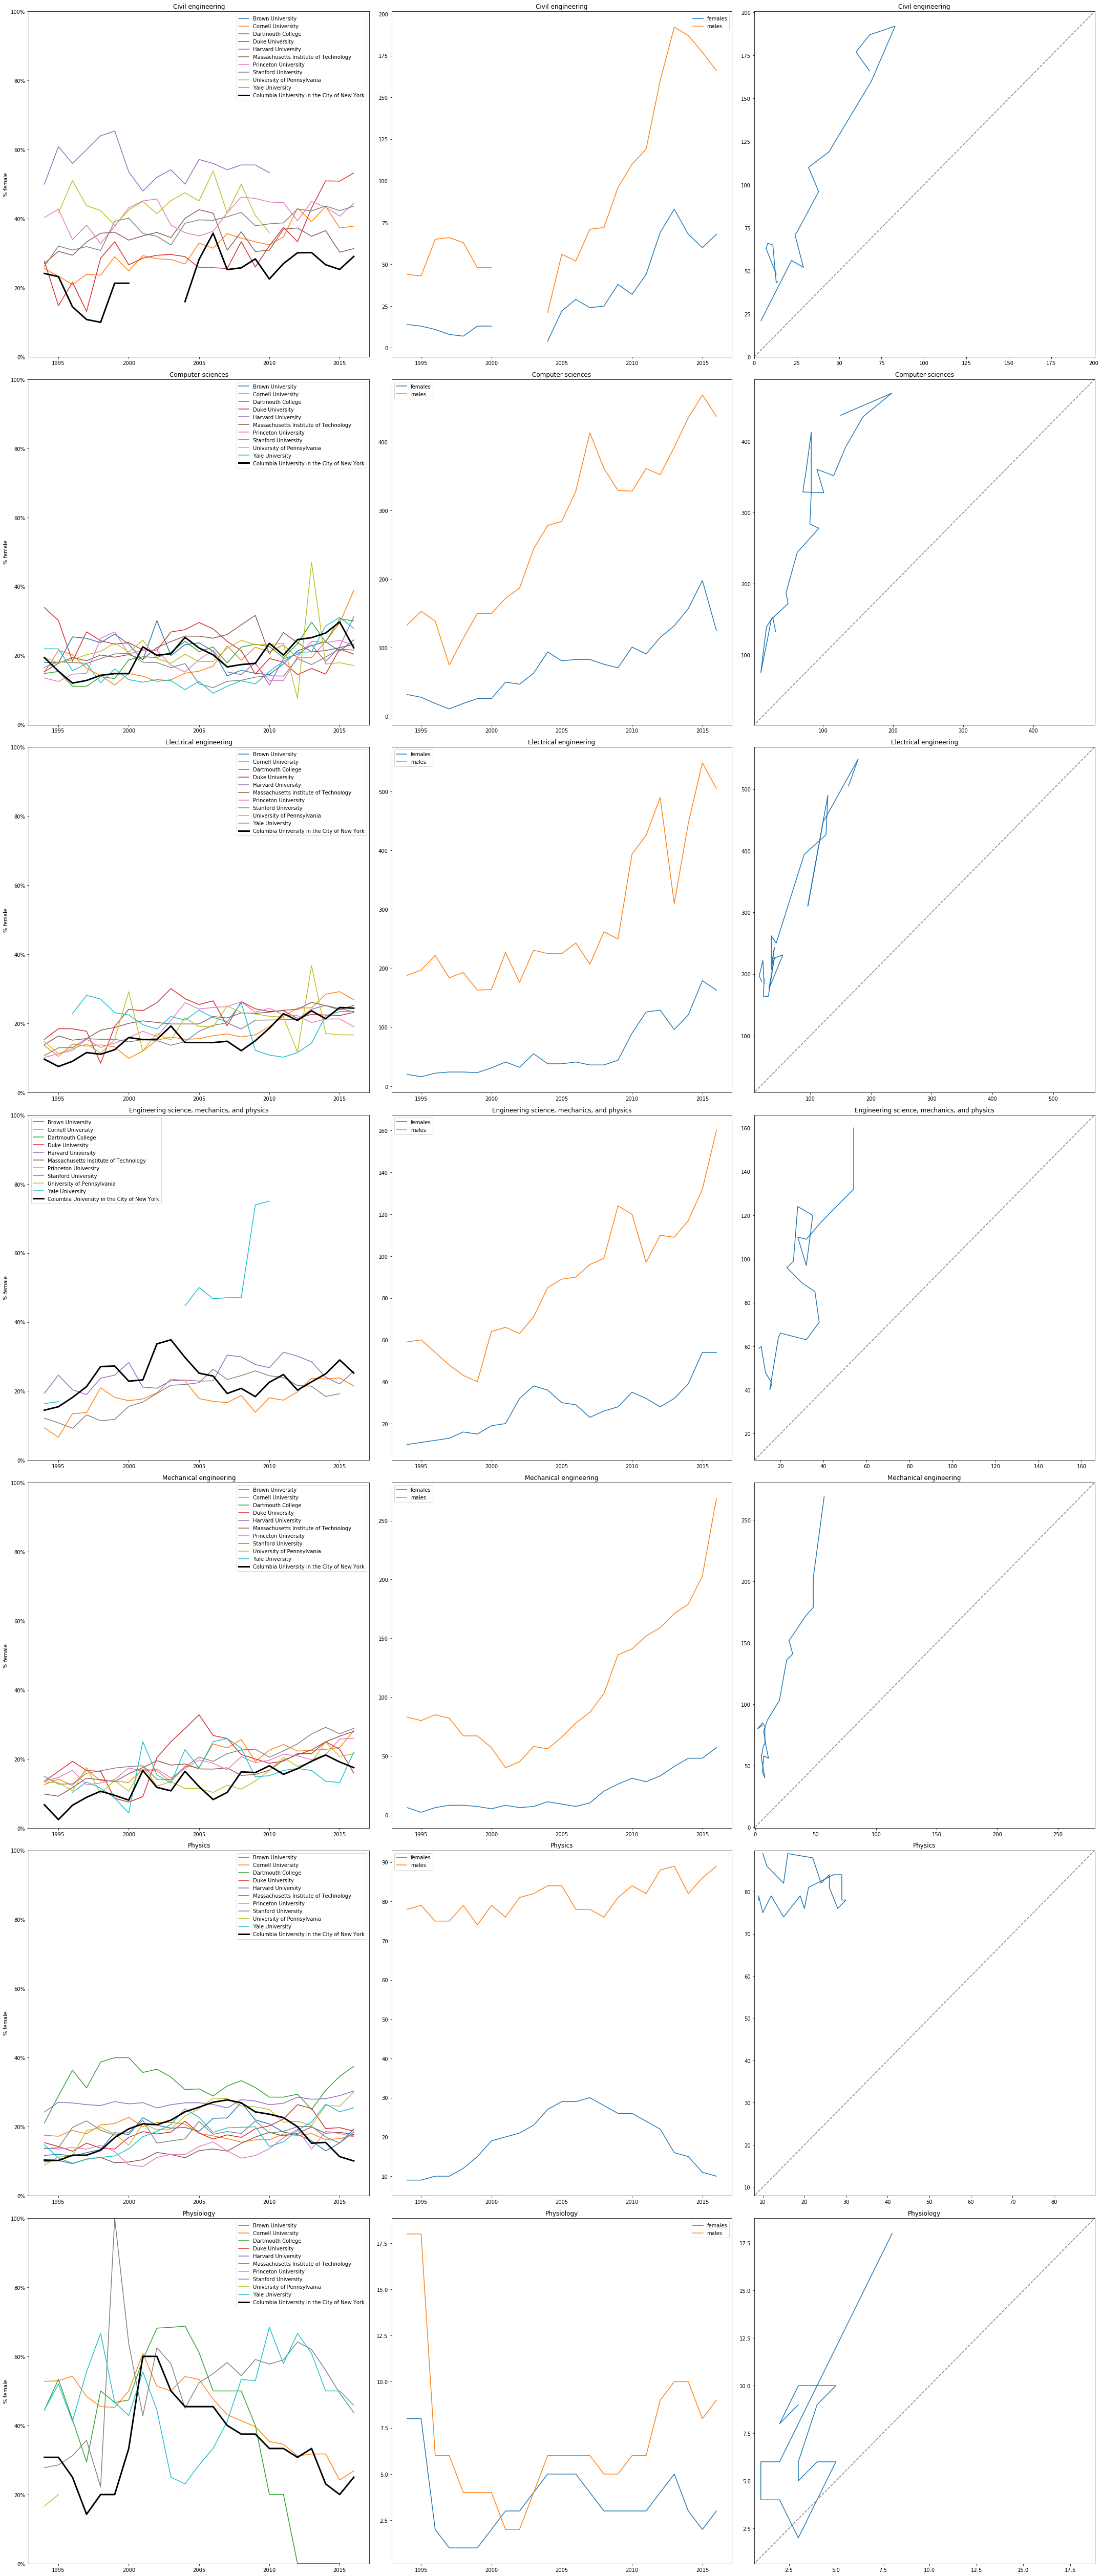

In [57]:
# Among these fields, Columbia has the least gender diversity compared to its peers
selected_fields = [
    'Civil engineering',
    'Computer sciences',
    'Electrical engineering', # ?
    'Engineering science, mechanics, and physics',
    'Mechanical engineering',
    'Physics',
    'Physiology',
]

fig, axArr = subplots(len(selected_fields)*3, cols=3)
for i, field in enumerate(selected_fields):
    plot_triplet(axArr, i, field)
fig.tight_layout()